# Get Data

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
data_train = pd.read_csv('E:\datasetsforanalysis\DailyDelhiClimateTrain.csv')
data_test = pd.read_csv('E:\datasetsforanalysis\DailyDelhiClimateTest.csv')
data_train_copy = data_train.copy()
data_test_copy = data_test.copy()

In [3]:
data_train_copy.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
data_test_copy.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
data_train_copy.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [6]:
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


# Set index = Date

In [7]:
data_train_copy['date'] = pd.to_datetime(data_train_copy['date'])

In [8]:
data_train_copy.set_index('date', inplace=True)

In [29]:
data_test_copy['date'] = pd.to_datetime(data_test_copy['date'])

In [30]:
data_test_copy.set_index('date', inplace=True)

In [9]:
data_train_copy.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


# Show if the data is Stationary or not?

<Axes: xlabel='date'>

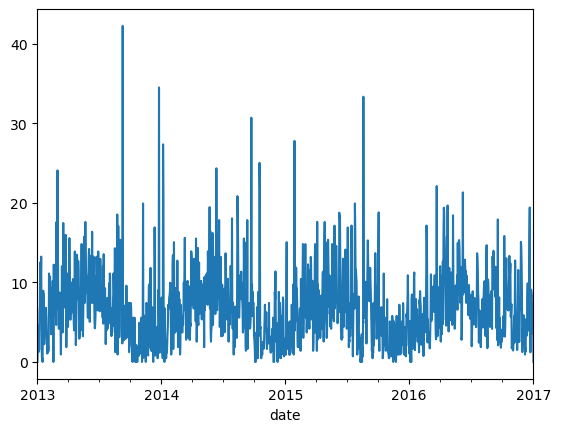

In [10]:
data_train_copy['wind_speed'].plot()

* as we can see temp not stationary, lets prove that!

<Axes: xlabel='date'>

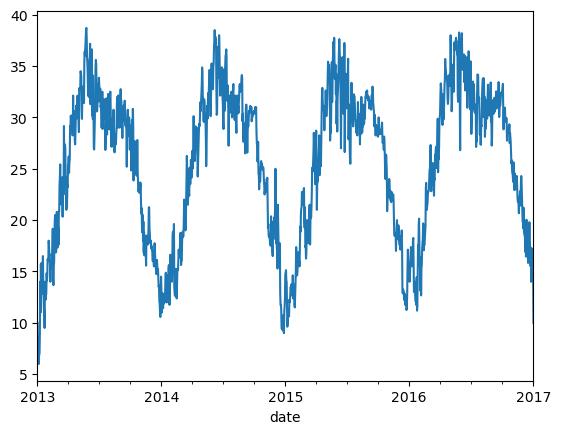

In [11]:
data_train_copy['meantemp'].plot()

<Axes: xlabel='date'>

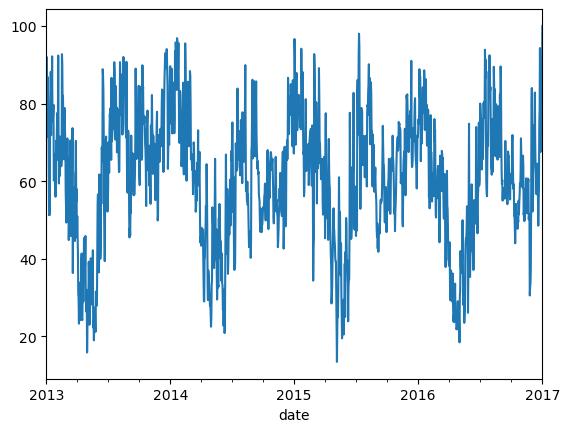

In [12]:
data_train_copy['humidity'].plot()

<Axes: xlabel='date'>

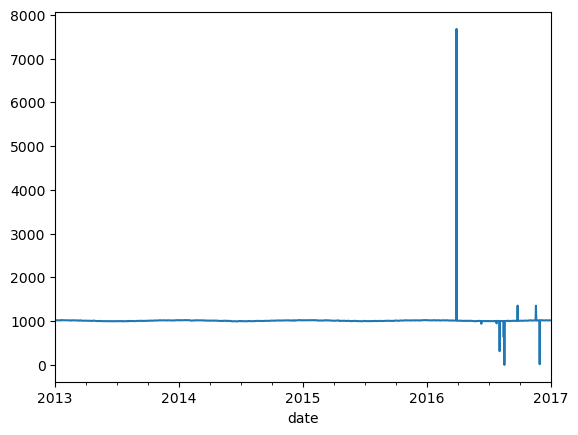

In [13]:
data_train_copy['meanpressure'].plot()

# Using adfuller statistics model for knowing the stationary.

In [14]:
data_train_wind = data_train_copy['wind_speed']
data_train_temp = data_train_copy['meantemp']
data_train_humidity = data_train_copy['humidity']
data_train_pressure = data_train_copy['meanpressure']

result_wind = adfuller(data_train_wind)
result_temp = adfuller(data_train_temp)
result_humidity = adfuller(data_train_humidity)
result_pressure = adfuller(data_train_pressure)

results = {'wind':result_wind[1], 'temp':result_temp[1], 'humidity':result_humidity[1], 'pressure':result_pressure[1]}

print('p-value:',results)

p-value: {'wind': 0.0025407221531463645, 'temp': 0.27741213723016056, 'humidity': 0.004470100478130723, 'pressure': 0.0}


In [15]:
for c, p in results.items():
    if p < 0.05:
        print('the data of {} is stationary series'.format(c))
    else:
        print('the data of {} is not stationary series'.format(c))

the data of wind is stationary series
the data of temp is not stationary series
the data of humidity is stationary series
the data of pressure is stationary series


# Make temp column from non_stationary to stationary.

In [16]:
# data_train_temp.diff(30).dropna()
df_diff = data_train_temp - data_train_temp.shift(freq='10D')
df_diff = df_diff.dropna()
df_diff

date
2013-01-11    5.714286
2013-01-12    6.600000
2013-01-13    8.666667
2013-01-14    4.166667
2013-01-15    8.714286
                ...   
2016-12-28    1.134058
2016-12-29   -2.619048
2016-12-30   -5.704762
2016-12-31   -2.997368
2017-01-01   -7.285714
Name: meantemp, Length: 1452, dtype: float64

In [17]:
res = adfuller(df_diff)
print('p_value: ',res[1])
if res[1] < 0.05:
    print('the data of is stationary series')
else:
    print('the data of is not stationary series')

p_value:  5.883308732818517e-05
the data of is stationary series


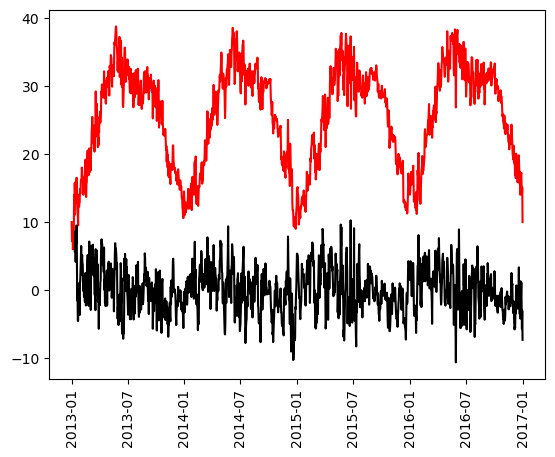

In [18]:
import matplotlib.pyplot as plt
plt.plot(data_train_temp, color = "red",label = "Original")
plt.plot(df_diff, color='black', label = "deff shiffting")
plt.xticks(rotation=90)
plt.show()

# Using ACF to know Stationary or not. 
* First plot is not stationary.
* Second plot is stationary.

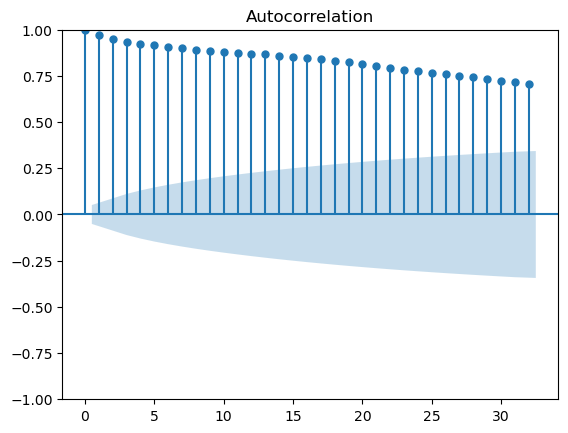

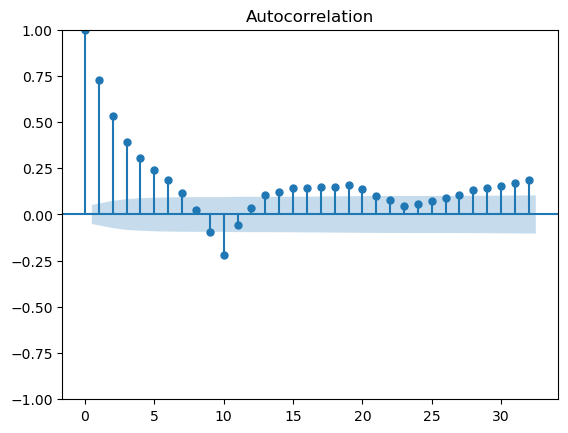

In [19]:
plot_acf(data_train_temp)
plt.show()
plot_acf(df_diff)
plt.show()

# Using auto_arima to get best hyperparameters for ARIMA Model.

In [47]:
test_arima = auto_arima(df_diff, m=1, trace=True, suppers_warnings=True)
test_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6444.072, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7533.706, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6438.672, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6837.985, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7531.988, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6440.342, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6440.339, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6442.118, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=6436.710, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6438.379, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6438.376, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6836.162, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6440.154, Time=0.30 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.911 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1452
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3216.355
Date:                Mon, 22 Apr 2024   AIC                           6436.710
Time:                        23:29:48   BIC                           6447.272
Sample:                    01-11-2013   HQIC                          6440.651
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7299      0.017     43.627      0.000       0.697       0.763
sigma2         4.9128      0.141     34.776      0.000       4.636       5.190
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               166.68
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fitting the Model and get the Prediction from 2016 to 2017.

In [64]:
# fit model
model = sm.tsa.arima.ARIMA(df_diff, order=(1,0,0),freq='D')
model_fit = model.fit()

# predict
forecast = model_fit.predict(start=df_diff.index[1100], end=df_diff.index[-1])
forecast

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2016-01-16   -2.056841
2016-01-17   -2.744196
2016-01-18   -2.269738
2016-01-19   -1.618880
2016-01-20   -2.543464
                ...   
2016-12-28   -0.463151
2016-12-29    0.839095
2016-12-30   -1.900426
2016-12-31   -4.152796
2017-01-01   -2.176576
Freq: D, Name: predicted_mean, Length: 352, dtype: float64

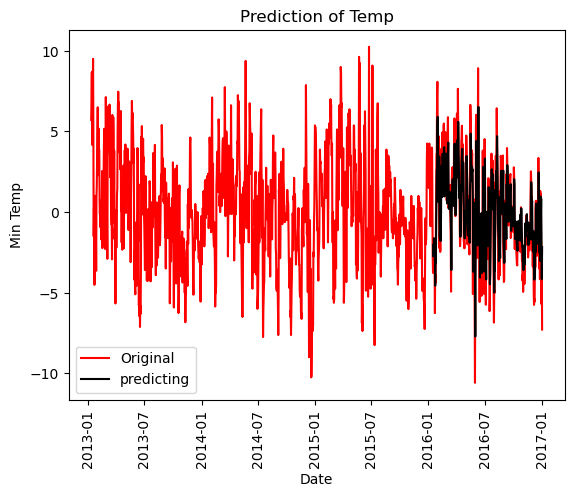

In [67]:
plt.plot(df_diff, color = "red",label = "Original")
plt.plot(forecast, color='black', label = "predicting")
plt.xticks(rotation=90)
plt.title('Prediction of Temp')
plt.ylabel('Min Temp')
plt.xlabel('Date')
plt.legend()
plt.show()

# Evaluation the Model

In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [98]:
arma_rmse = np.sqrt(mean_squared_error(np.array(df_diff[:352]), np.array(forecast)))
print("RMSE: ",arma_rmse)

RMSE:  3.873659425784824
